In [1]:
import pandas as pd
import numpy as np
import random
import seaborn as sns;sns.set()
import matplotlib.pyplot as plt
%matplotlib inline



In [2]:
data = pd.read_csv('C://Users//Cartan//Downloads//Data//EDA//Compeleted//students-performance-in-exams (Decision Tree and RF)//StudentsPerformance.csv')

In [3]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


## Basics features of data

In [4]:
data.shape

(1000, 8)

In [5]:
data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
gender                         1000 non-null object
race/ethnicity                 1000 non-null object
parental level of education    1000 non-null object
lunch                          1000 non-null object
test preparation course        1000 non-null object
math score                     1000 non-null int64
reading score                  1000 non-null int64
writing score                  1000 non-null int64
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


## Assigning keys to different Categories in given dataset

In [7]:
q=data["race/ethnicity"].unique().tolist()
e=data["parental level of education"].unique().tolist()
r=data["lunch"].unique().tolist()
t=data["test preparation course"].unique().tolist()
print(q,e,r,t)


['group B', 'group C', 'group A', 'group D', 'group E'] ["bachelor's degree", 'some college', "master's degree", "associate's degree", 'high school', 'some high school'] ['standard', 'free/reduced'] ['none', 'completed']


In [8]:
data["gender"] = data["gender"].map({'female':0, 'male':1})
data["race/ethnicity"]= data["race/ethnicity"].map({'group A':1,'group B':2,'group C':3,'group D':4,"group E":5})
data['parental level of education']= data["parental level of education"].map({"bachelor's degree":1,"some college":2,"master's degree":3,"associate's degree":4,"high school":5,"some high school":6})
data['lunch']=data['lunch'].map({'standard':1, 'free/reduced':0})
data["test preparation course"]=data["test preparation course"].map({'none':0, 'completed':1})                                                                           

In [9]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,0,2,1,1,0,72,72,74
1,0,3,2,1,1,69,90,88
2,0,2,3,1,0,90,95,93
3,1,1,4,0,0,47,57,44
4,1,3,2,1,0,76,78,75


## Check for any missing value

In [10]:
data.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

## Exploration of data

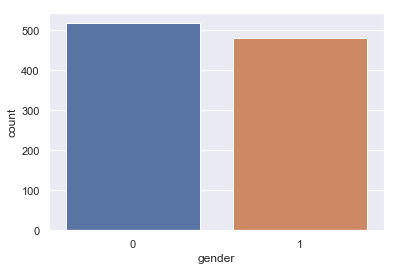

In [11]:
fig , ax = plt.subplots(figsize=(6,4))
sns.countplot(x='gender', data=data)
plt.show()

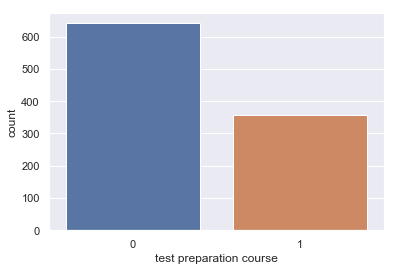

In [12]:
sns.countplot(x='test preparation course', data=data)

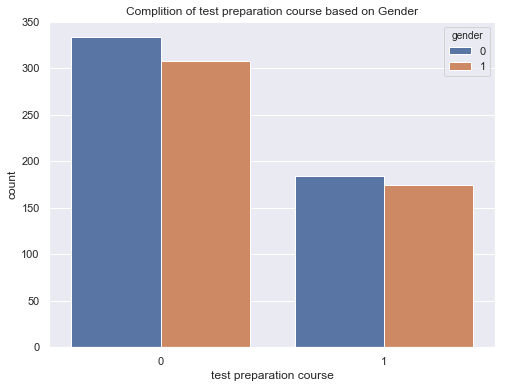

In [13]:
fig, ax=plt.subplots(figsize=(8,6))
sns.countplot(x='test preparation course', data=data, hue='gender')
#ax.set_ylim(0,500)
plt.title("Complition of test preparation course based on Gender")
plt.show()

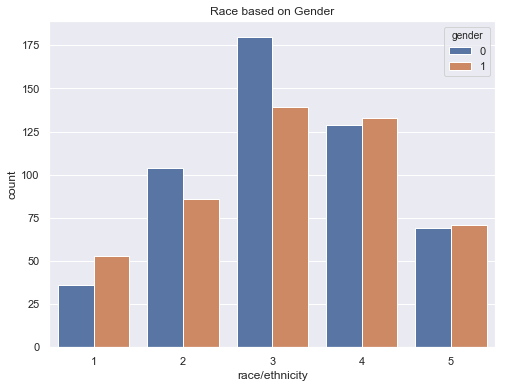

In [14]:
fig, ax=plt.subplots(figsize=(8,6))
sns.countplot(x='race/ethnicity', data=data, hue='gender')
plt.title("Race based on Gender")
plt.show()

In [15]:
#sns.countplot(x="math score", hue="gender",data=data)

C:\Users\Cartan\AppData\Local\conda\conda\envs\ml\lib\site-packages\seaborn\axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


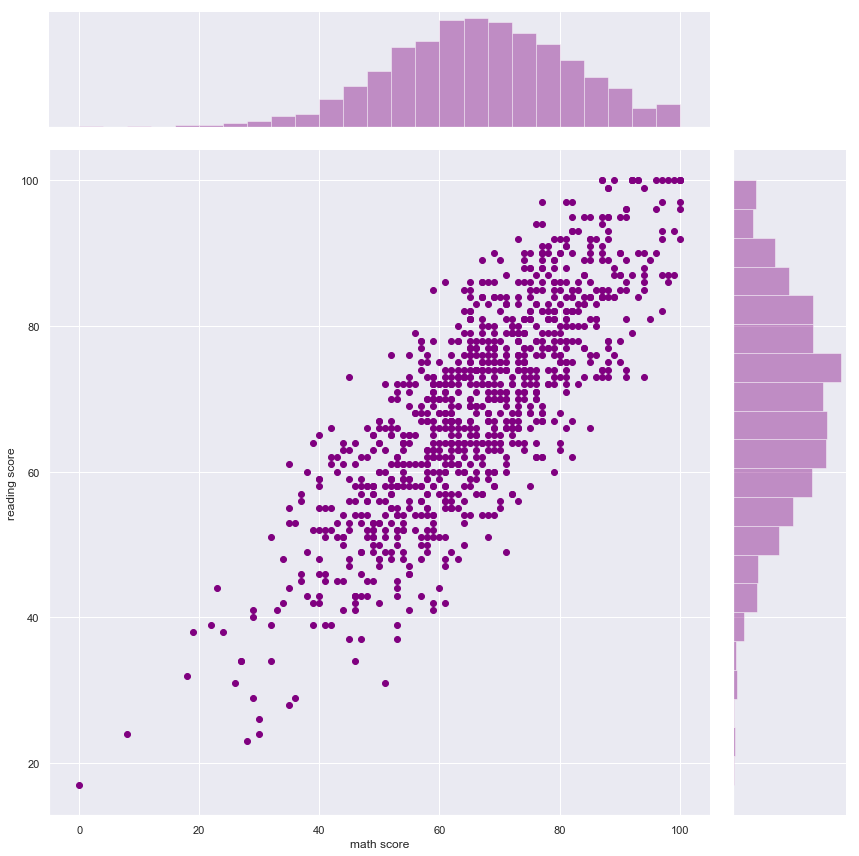

In [16]:
sns.jointplot(x='math score',y='reading score',data=data, color='purple', size=12)

C:\Users\Cartan\AppData\Local\conda\conda\envs\ml\lib\site-packages\seaborn\axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


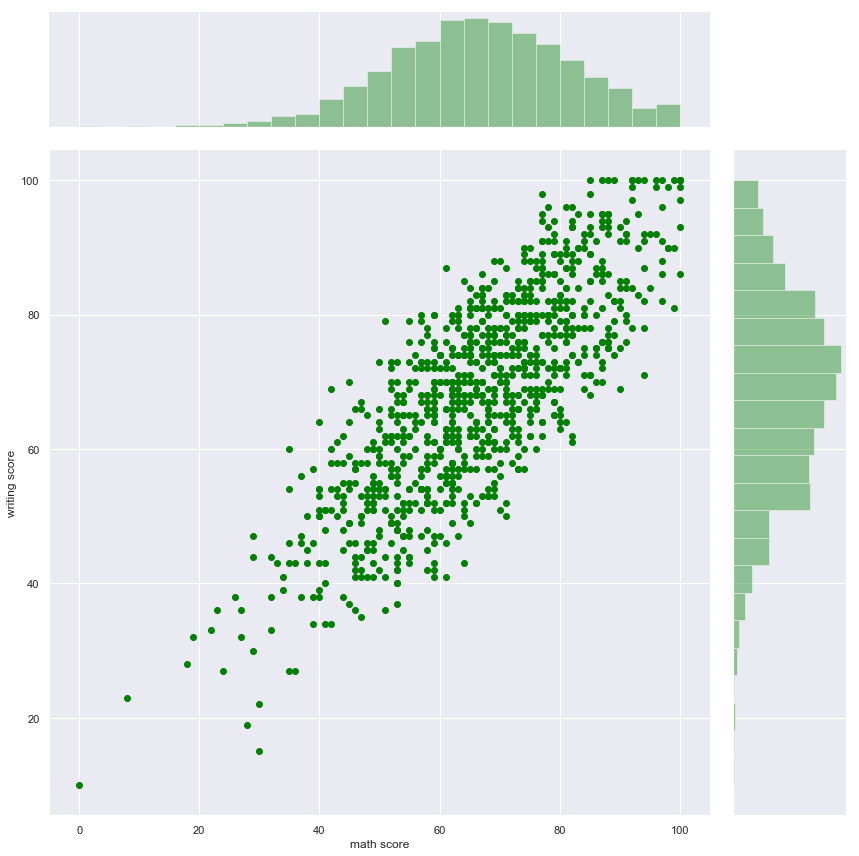

In [17]:
sns.jointplot(x='math score',y='writing score',data=data, color='green', size=12)

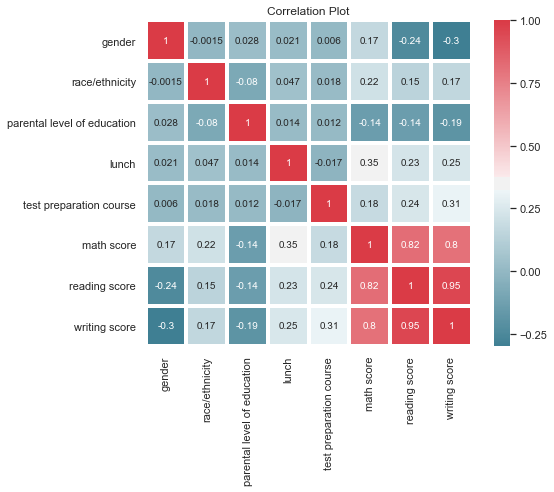

In [18]:
fig, ax =plt.subplots(figsize=(8, 6))
plt.title("Correlation Plot")
sns.heatmap(data.corr(), mask=np.zeros_like(data.corr(), dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax, annot=True,linewidths=3)
plt.show()

As we can clearly see from the graph that there is a linear positive relationship between the test scores (with correlation value greater than 0.8), hence consider them as a one and test it with other factors like:-
   * Parental level of Education
   * Test preperation course
   * Race/ethnicity

## Combining test score and deleting extra columns

In [19]:
data["Total Marks"] = data["math score"]+ data["reading score"]+ data["writing score"]

In [20]:
del data["writing score"]
del data["reading score"]
del data["math score"]

### New Data Head

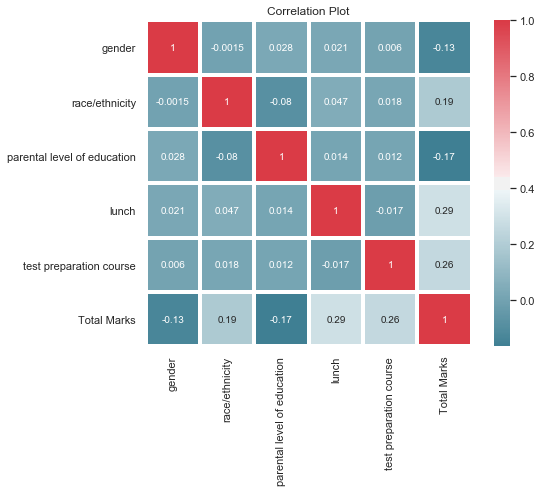

In [21]:
fig, ax =plt.subplots(figsize=(8, 6))
plt.title("Correlation Plot")
sns.heatmap(data.corr(), mask=np.zeros_like(data.corr(), dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax, annot=True,linewidths=3)
plt.show()

__Splitting Train & Test cases__

In [22]:
from sklearn.model_selection import train_test_split
X = data.drop('test preparation course',axis=1)
y = data['test preparation course']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

__Training the Decision Tree model__

In [23]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion='gini',max_depth=None)
dtree.fit(X_train,y_train)
predictions = dtree.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.67      0.67      0.67       194
           1       0.40      0.40      0.40       106

   micro avg       0.57      0.57      0.57       300
   macro avg       0.53      0.53      0.53       300
weighted avg       0.57      0.57      0.57       300



In [ ]:
cm=confusion_matrix(y_test,predictions)
print(cm)
print ("Accuracy of prediction using Decicion Tree:",(100 * round((cm[0,0]+cm[1,1])/cm.sum(),3)))

[[130  64]
 [ 64  42]]
Accuracy of prediction using Decicion Tree: 57.3


__Training the Random Forest model__

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=600)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=600, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [ ]:
rfc_pred = rfc.predict(X_test)
cr = classification_report(y_test,rfc_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.66      0.73      0.70       194
           1       0.40      0.32      0.35       106

   micro avg       0.59      0.59      0.59       300
   macro avg       0.53      0.53      0.53       300
weighted avg       0.57      0.59      0.58       300



In [ ]:
cm = confusion_matrix(y_test,rfc_pred)
print(cm)

[[142  52]
 [ 72  34]]


In [ ]:
base_accuracy = round((cm[0,0]+cm[1,1])/cm.sum(),3)
print ("Accuracy of prediction using Random forest is {:0.2f}%.".format( 100 * base_accuracy))

Accuracy of prediction using Random forest is 58.70%.


__Grid Search with Cross Validation__

In [ ]:
def evaluate(model, X_test, y_test):
    predictions = model.predict(X_test)
    errors = abs(predictions - y_test)
    cm = confusion_matrix(y_test,predictions)
    accuracy = round((cm[0,0]+cm[1,1])/cm.sum(),3)
    
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(100 * accuracy))
    
    return accuracy

In [ ]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 5, n_jobs = -1, verbose = 2)



grid_search.fit(X_train, y_train)
grid_search.best_params_

Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   15.2s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   54.3s


In [ ]:
best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid, X_test, y_test)

In [ ]:
print('Improvement of {:0.2f}%.'.format( 100 * (grid_accuracy - base_accuracy) / base_accuracy))